<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/Example%20-%20CF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"pson2809","key":"f045f4a4adb9707f5c86d18bc28608b2"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Mar 10 02:30 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# List available datasets.
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          14073  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           2487  
lava18/google-play-store-apps                                Google Play Store Apps                                2MB  2019-02-03 13:55:47          40817  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          10048  
karangadiya/fifa19                                        

In [7]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d CooperUnion/anime-recommendations-database

anime-recommendations-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip anime-recommendations-database.zip

Archive:  anime-recommendations-database.zip
replace anime.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [9]:
!pip install surprise

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [11]:
anime = pd.read_csv('anime.csv')
user = pd.read_csv('rating.csv')
user.head(5)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [12]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)
MRPU.head(5)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


In [15]:
user = pd.merge(user,MRPU, on=['user_id','user_id'])
user = user.drop(user[user.rating < user.mean_rating].index)


AttributeError: ignored

In [0]:
user = user.rename({'rating':'userRating'}, axis='columns')


In [18]:
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata.head(10)


,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating_x,mean_rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328,8.680328


In [39]:
mergedata['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       '39', '101', '47', '50', '62', '33', '112', '23', '3', '94', '8',
       '14', '7', '40', '15', '203', '77', '291', '6', '102', '96', '38',
       '79', '175', '103', '70', '153', '45', '5', '21', '63', '52', '28',
       '145', '36', '69', '60', '178', '114', '35', '61', '34', '109',
       '20', '9', '49', '366', '97', '48', '78', '358', '155', '104',
       '113', '54', '167', '161', '42', '142', '31', '373', '220', '46',
       '195', '17', '1787', '73', '147', '127', '16', '19', '98', '150',
       '76', '53', '124', '29', '115', '224', '44', '58', '93', '154',
       '92', '67', '172', '86', '30', '276', '59', '72', '330', '41',
       '105', '128', '137', '56', '55', '65', '243', '193', '18', '191',
       '180', '91', '192', '66', '182', '32', '100', '296', '694', '95',
       '68', '117', '130', '170', '119', '84', '108', '331

In [0]:
features = ['name','genre','type']
def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]
    if len(names) > 3:
      names = names[:5]
    return names
  # xuat gia tri ten phim voi 5 ten gan nhat
  return []
def clean_data(x):
  if isinstance(x, list):
    return [str.lower(i.replace(" ",""))for i in x]
  else:
    if isinstance(x, str):
      return str.lower(x.replace(" ",""))
for feature in features:
  mergedata[feature] = mergedata[feature].apply(clean_data)

In [43]:
def create

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating_x,mean_rating_y
0,32281,kiminonawa.,"drama,romance,school,supernatural",movie,1,9.37,200630,152,10,7.699301,7.699301
1,32281,kiminonawa.,"drama,romance,school,supernatural",movie,1,9.37,200630,244,10,8.729242,8.729242
2,32281,kiminonawa.,"drama,romance,school,supernatural",movie,1,9.37,200630,271,10,7.372287,7.372287
3,32281,kiminonawa.,"drama,romance,school,supernatural",movie,1,9.37,200630,322,10,8.356322,8.356322
4,32281,kiminonawa.,"drama,romance,school,supernatural",movie,1,9.37,200630,398,10,-0.832298,-0.832298


,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating_x,mean_rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298,-0.832298


In [34]:
user_anime = user_anime.fillna(0)
user_anime['name']

KeyError: ignored

In [32]:
user_anime.head(5)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
ps = pd.DataFrame(pca_samples)
ps.head(5)

,0,1,2
0,-13.381338,-3.875624,3.022819
1,-14.669819,-2.218197,0.666000
2,2.572545,-10.612918,-8.926468
3,0.871154,-2.382939,5.496794
4,28.365092,-2.092485,-5.553844


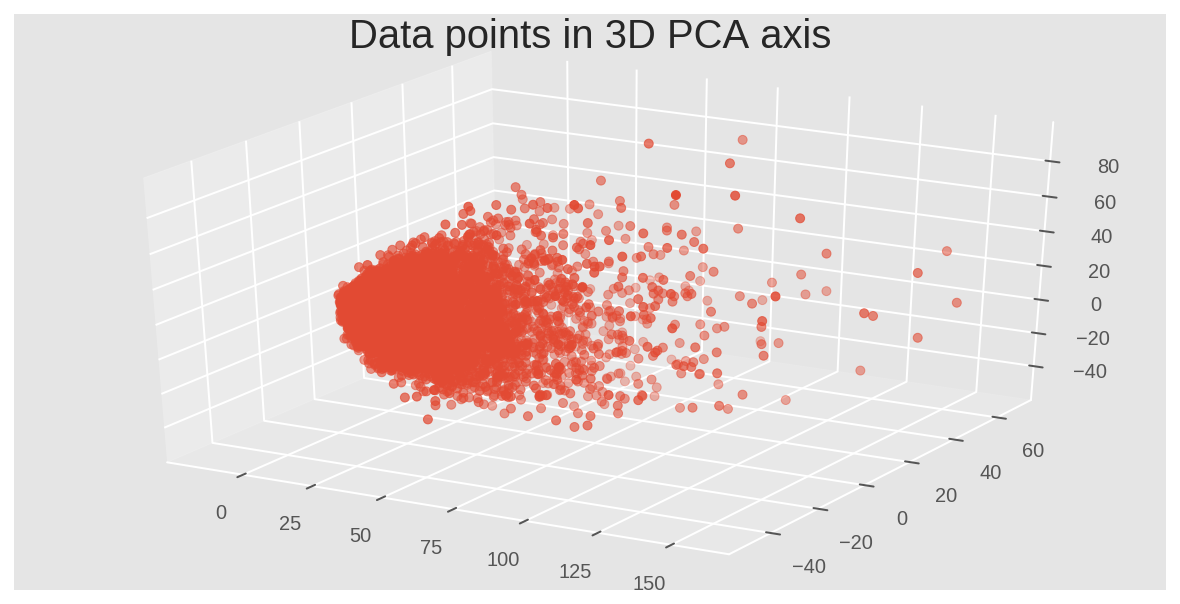

In [31]:
tocluster = pd.DataFrame(ps[[0,1,2]])

plt.rcParams['figure.figsize'] = (8, 4)
# dat ten bieu do va so khung

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

